# Emotion Mining on Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests

In [2]:
wm_title = []  
wm_date = []
wm_content = []
wm_rating = []

In [3]:
for i in range(1,100):
    ip = []  
    url = "https://www.amazon.in/Lenovo-IdeaPad-Windows-Platinum-81VV00JFIN/product-reviews/B087D3KCZK/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")    # creating soup object to iterate over the extracted content 

In [4]:
# Extracting Content of review

review = soup.find_all("span", {"data-hook":"review-body"})
review_content = []
for i in range(0, len(review)):
    review_content.append(review[i].get_text())
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
wm_content = wm_content + review_content  

In [5]:
# Extracting Review Title

title = soup.find_all('a',class_= 'review-title-content')
review_title = []
for i in range(0, len(title)):
    review_title.append(title[i].get_text())
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title[:] = [titles.rstrip('\n') for titles in review_title]
wm_title = wm_title + review_title

In [6]:
# Extracting Ratings

rating = soup.find_all('i', class_ = 'review-rating')
review_rating = []
for i in range(2, len(rating)):
    review_rating.append(rating[i].get_text())

# review_rating.pop(0)
# review_rating.pop(0)

review_rating[:] = [reviews.rstrip(' out of 5 stars') for reviews in review_rating]
wm_rating = wm_rating + review_rating  

In [7]:
# Extracting dates of reviews

dates = soup.find_all('span', class_ = 'review-date')
review_dates = []
for i in range(2, len(rating)):
    review_dates.append(dates[i].get_text())
review_dates[:] = [reviews.lstrip('Reviewed in India on') for reviews in review_dates]

#review_dates.pop(0)
#review_dates.pop(0)

wm_date  = wm_date + review_dates  

In [8]:
print(len(wm_title))
print(len(wm_rating))
print(len(wm_content))
print(len(wm_date))

10
10
10
10


In [9]:
df = pd.DataFrame()
df['Title'] = wm_title
df['Ratings'] = wm_rating
df['Comments'] = wm_content
df['Date'] = wm_date

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Ratings'] = df['Ratings'].astype(float)
df.head()

,Title,Ratings,Comments,Date
0,"Its an Ultrabook , So it comes with premium fe...",3.0,Update :- 08th June - Reduced my rating from 5...,2020-01-22
1,"Configuration wise good, quality and customer ...",3.0,29 Sep 2020 after 7 months of use:Reduing the ...,2020-01-24
2,I am full satisfied at this price with best pe...,5.0,Really nice thin and light laptop at this pric...,2020-01-20
3,It's a mini i3 Beast...,5.0,If the specifications of this laptop meet your...,2020-02-03
4,amazon cheated me by delivered old machine,1.0,i purchased laptop on june'20 and when i regis...,2020-06-28


In [11]:
from nltk.corpus import wordnet

In [12]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [13]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anuja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
def clean_text(text):
# Lower text
    
    text = text.lower()
    
# Tokenize text and remove puncutation
    
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
# Remove words that contain numbers
    
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
# Remove stop words
    
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
# Remove empty tokens
    
    text = [t for t in text if len(t) > 0]
    
# pos tag text
    
    pos_tags = pos_tag(text)
    
# Lemmatize text
    
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
# Remove words with only one letter
    
    text = [t for t in text if len(t) > 1]
    
# Join all
    
    text = " ".join(text)
    return(text)

In [15]:
# Clean text data

df["Comments"] = df["Comments"].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df.head()

,Title,Ratings,Comments,Date
0,ultrabook come premium feel build,3.0,update june reduce rating star battery need ca...,2020-01-22
1,configuration wise good quality customer servi...,3.0,sep month use:reduing rating star face issue l...,2020-01-24
2,full satisfied price best performance,5.0,really nice thin light laptop price one day de...,2020-01-20
3,mini beast,5.0,specification laptop meet requirement go witho...,2020-02-03
4,amazon cheat delivered old machine,1.0,purchase laptop registered device online lenov...,2020-06-28


In [16]:
#  Add sentiment anaylsis columns

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [17]:
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comments"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis = 1), df['sentiments'].apply(pd.Series)], axis = 1)

In [18]:
df

,Title,Ratings,Comments,Date,neg,neu,pos,compound
0,ultrabook come premium feel build,3.0,update june reduce rating star battery need ca...,2020-01-22,0.026,0.774,0.200,0.9865
1,configuration wise good quality customer servi...,3.0,sep month use:reduing rating star face issue l...,2020-01-24,0.087,0.662,0.251,0.9653
2,full satisfied price best performance,5.0,really nice thin light laptop price one day de...,2020-01-20,0.000,0.664,0.336,0.9492
3,mini beast,5.0,specification laptop meet requirement go witho...,2020-02-03,0.081,0.655,0.264,0.7791
4,amazon cheat delivered old machine,1.0,purchase laptop registered device online lenov...,2020-06-28,0.000,0.839,0.161,0.5267
5,review lenovo ideapad generation intel core,5.0,look buy laptop ram core gen hard find price r...,2020-06-21,0.089,0.822,0.089,0.2500
6,good laptop battery faulty,2.0,delivery prompt laptop nice look feel well goo...,2020-02-01,0.066,0.712,0.222,0.6705
7,great deal,5.0,ice lake fhd ip ram ssd killer performance box...,2020-01-26,0.126,0.667,0.206,0.6741
8,poor man apple macbook air 👌🏻,5.0,bought wife love give star.build extremely sol...,2020-03-01,0.051,0.604,0.345,0.9905
9,poor quality product lenovo,1.0,receive lenovo june within day gentle usage sh...,2020-06-29,0.222,0.558,0.220,-0.0284


In [19]:
# Add number of characters column

df["nb_chars"] = df["Comments"].apply(lambda x: len(x))

In [20]:
df

,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars
0,ultrabook come premium feel build,3.0,update june reduce rating star battery need ca...,2020-01-22,0.026,0.774,0.200,0.9865,1366
1,configuration wise good quality customer servi...,3.0,sep month use:reduing rating star face issue l...,2020-01-24,0.087,0.662,0.251,0.9653,694
2,full satisfied price best performance,5.0,really nice thin light laptop price one day de...,2020-01-20,0.000,0.664,0.336,0.9492,271
3,mini beast,5.0,specification laptop meet requirement go witho...,2020-02-03,0.081,0.655,0.264,0.7791,290
4,amazon cheat delivered old machine,1.0,purchase laptop registered device online lenov...,2020-06-28,0.000,0.839,0.161,0.5267,175
5,review lenovo ideapad generation intel core,5.0,look buy laptop ram core gen hard find price r...,2020-06-21,0.089,0.822,0.089,0.2500,420
6,good laptop battery faulty,2.0,delivery prompt laptop nice look feel well goo...,2020-02-01,0.066,0.712,0.222,0.6705,190
7,great deal,5.0,ice lake fhd ip ram ssd killer performance box...,2020-01-26,0.126,0.667,0.206,0.6741,411
8,poor man apple macbook air 👌🏻,5.0,bought wife love give star.build extremely sol...,2020-03-01,0.051,0.604,0.345,0.9905,698
9,poor quality product lenovo,1.0,receive lenovo june within day gentle usage sh...,2020-06-29,0.222,0.558,0.220,-0.0284,299


In [21]:
# Add number of words column

df["nb_words"] = df["Comments"].apply(lambda x: len(x.split(" ")))
df

,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars,nb_words
0,ultrabook come premium feel build,3.0,update june reduce rating star battery need ca...,2020-01-22,0.026,0.774,0.200,0.9865,1366,206
1,configuration wise good quality customer servi...,3.0,sep month use:reduing rating star face issue l...,2020-01-24,0.087,0.662,0.251,0.9653,694,96
2,full satisfied price best performance,5.0,really nice thin light laptop price one day de...,2020-01-20,0.000,0.664,0.336,0.9492,271,44
3,mini beast,5.0,specification laptop meet requirement go witho...,2020-02-03,0.081,0.655,0.264,0.7791,290,42
4,amazon cheat delivered old machine,1.0,purchase laptop registered device online lenov...,2020-06-28,0.000,0.839,0.161,0.5267,175,25
5,review lenovo ideapad generation intel core,5.0,look buy laptop ram core gen hard find price r...,2020-06-21,0.089,0.822,0.089,0.2500,420,65
6,good laptop battery faulty,2.0,delivery prompt laptop nice look feel well goo...,2020-02-01,0.066,0.712,0.222,0.6705,190,29
7,great deal,5.0,ice lake fhd ip ram ssd killer performance box...,2020-01-26,0.126,0.667,0.206,0.6741,411,54
8,poor man apple macbook air 👌🏻,5.0,bought wife love give star.build extremely sol...,2020-03-01,0.051,0.604,0.345,0.9905,698,100
9,poor quality product lenovo,1.0,receive lenovo june within day gentle usage sh...,2020-06-29,0.222,0.558,0.220,-0.0284,299,44


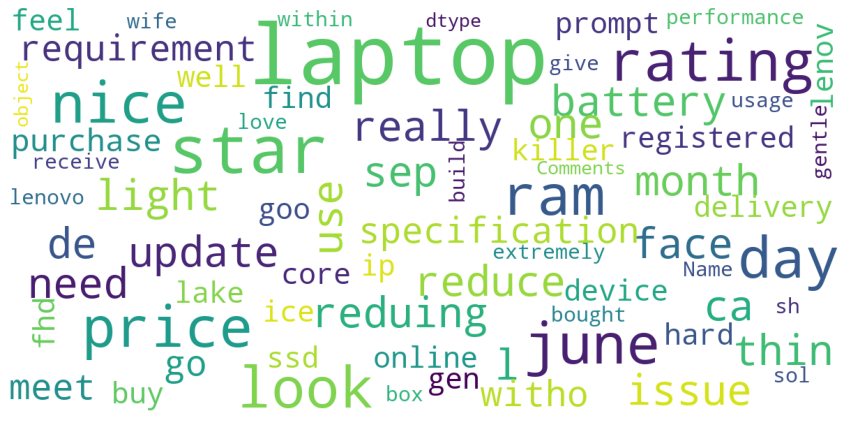

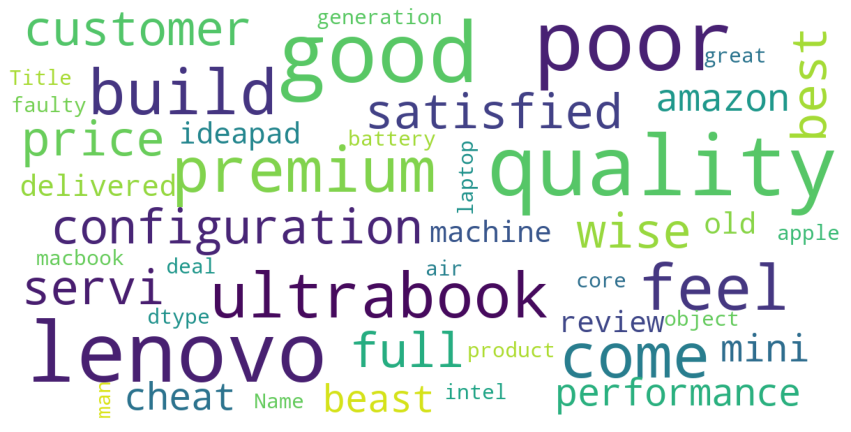

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(df["Comments"])
show_wordcloud(df["Title"])

In [25]:
# Highest positive sentiment reviews (with more than 5 words)

df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)

,Comments,pos
8,bought wife love give star.build extremely sol...,0.345
2,really nice thin light laptop price one day de...,0.336
3,specification laptop meet requirement go witho...,0.264
1,sep month use:reduing rating star face issue l...,0.251
6,delivery prompt laptop nice look feel well goo...,0.222
9,receive lenovo june within day gentle usage sh...,0.220
7,ice lake fhd ip ram ssd killer performance box...,0.206
0,update june reduce rating star battery need ca...,0.200
4,purchase laptop registered device online lenov...,0.161
5,look buy laptop ram core gen hard find price r...,0.089


In [26]:
# Lowest negative sentiment reviews (with more than 5 words)

df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)

,Comments,neg
9,receive lenovo june within day gentle usage sh...,0.222
7,ice lake fhd ip ram ssd killer performance box...,0.126
5,look buy laptop ram core gen hard find price r...,0.089
1,sep month use:reduing rating star face issue l...,0.087
3,specification laptop meet requirement go witho...,0.081
6,delivery prompt laptop nice look feel well goo...,0.066
8,bought wife love give star.build extremely sol...,0.051
0,update june reduce rating star battery need ca...,0.026
2,really nice thin light laptop price one day de...,0.000
4,purchase laptop registered device online lenov...,0.000
